# Forth Assignment - Interpretability

Ferdinantos Kottas ΑΕΜ:128

# Task 2

Our objective in this second task was to initially develop a white and a black box model, and compare their performance. Then, we to aimed to offer a global interpretation and a local interpretation for each model

Importing of Libraries

In [115]:
from sklearn import datasets,model_selection
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from ipywidgets import interactive
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate
import shap
import time

Importing of the Dataset

In [56]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Split the dataset into features (X) and target variable (y)
X = diabetes.data
y = diabetes.target
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3,random_state=0)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
training = time.time()
linreg = LinearRegression()
param_grid = {'regressor__fit_intercept': [True, False]}
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', linreg)
])

grid = GridSearchCV(pipe, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .....regressor__fit_intercept=True;, score=0.548 total time=   0.0s
[CV 2/5] END .....regressor__fit_intercept=True;, score=0.361 total time=   0.0s
[CV 3/5] END .....regressor__fit_intercept=True;, score=0.505 total time=   0.0s
[CV 4/5] END .....regressor__fit_intercept=True;, score=0.618 total time=   0.0s
[CV 5/5] END .....regressor__fit_intercept=True;, score=0.215 total time=   0.0s
[CV 1/5] END ...regressor__fit_intercept=False;, score=-3.511 total time=   0.0s
[CV 2/5] END ...regressor__fit_intercept=False;, score=-3.730 total time=   0.0s
[CV 3/5] END ...regressor__fit_intercept=False;, score=-4.268 total time=   0.0s
[CV 4/5] END ...regressor__fit_intercept=False;, score=-2.074 total time=   0.0s
[CV 5/5] END ...regressor__fit_intercept=False;, score=-4.824 total time=   0.0s
Training time (sec):  0.09083008766174316


In [86]:
# Get the best parameters
best_params = grid.best_params_

# Create a new pipeline with the best parameters
best_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
best_pipe.set_params(**best_params)

# Train the model with the best parameters
training = time.time()
best_pipe.fit(X_train, y_train)
print('Training time (sec): ', time.time() - training)

# Evaluate the model
y_pred = best_pipe.predict(X_test)

Training time (sec):  0.007977485656738281


In [87]:
# Calculate evaluation metrics
mse_white_box = mean_squared_error(y_test, y_pred)
mae_white_box = mean_absolute_error(y_test, y_pred)
r2_white_box = r2_score(y_test, y_pred)

# Print the evaluation results
print("Mean Squared Error (MSE):", mse_white_box)
print("Mean Absolute Error (MAE):", mae_white_box)
print("R-squared (R2):", r2_white_box)

Mean Squared Error (MSE): 2900.173287883232
Mean Absolute Error (MAE): 42.793893041965255
R-squared (R2): 0.45260660216173787


In [88]:
# Get the coefficients of the linear regression model
coefficients = grid.best_estimator_.named_steps['regressor'].coef_

# Get the feature names from the scaler step of the pipeline
feature_names = grid.best_estimator_.named_steps['scaler'].get_feature_names_out()

# Sort the coefficients and feature names together
coefficients_sorted = sorted(zip(coefficients, feature_names), reverse=True)

# Print the global interpretation
print("Global Interpretation:")
for coef, feature_name in coefficients_sorted:
    print(f"{feature_name}: {coef}")

Global Interpretation:
x8: 35.16068783888521
x2: 25.60697957356228
x5: 24.64008687821528
x3: 16.82909953486283
x7: 13.138408649969065
x6: 7.676204996814319
x9: 2.351386234383065
x0: 1.753586470776254
x1: -11.511898812668122
x4: -44.44753934169162


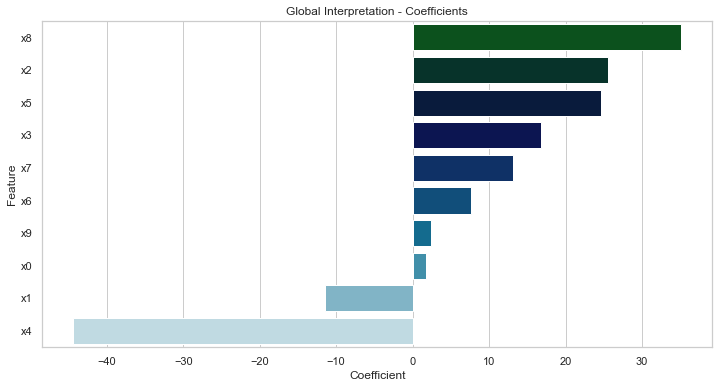

In [89]:
# Get the coefficients and feature names
coefficients = [coef for coef, _ in coefficients_sorted]
feature_names = [feature_name for _, feature_name in coefficients_sorted]

# Set up the plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x=coefficients, y=feature_names, palette="ocean")

# Set labels and title
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Global Interpretation - Coefficients")

# Show the plot
plt.show()

In [90]:
# Get the coefficients of the linear regression model
coefficients = grid.best_estimator_.named_steps['regressor'].coef_

# Get the specific instance for local interpretation
instance = X_train[0]

# Calculate the local interpretability
local_interpretation = coefficients * instance

# Get the feature names
feature_names = ['x0', 'x1', 'x2', "x3", "x4", "x5", "x6", "x7", "x8", "x9"]

# Print the local interpretation
print("Local Interpretation:")
for feature, value in zip(feature_names, local_interpretation):
    print(f"{feature}: {value}")

Local Interpretation:
x0: 2.627512997717851
x1: -12.218382671814183
x2: 5.6310263148559025
x3: 19.166270367518536
x4: -32.37882725843766
x5: 26.017303124959913
x6: -6.328652223481661
x7: 9.341904325039849
x8: 19.252598640962255
x9: -0.14449023722733298


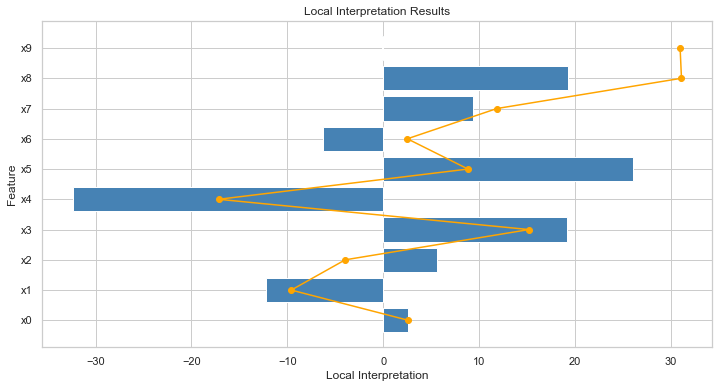

Predicted value: [184.70280729]


In [91]:
# Calculate cumulative sum of local interpretation values
cumulative_values = np.cumsum(local_interpretation)

# Set up the plot
plt.figure(figsize=(12, 6))
plt.barh(feature_names, local_interpretation, color='steelblue')
plt.plot(cumulative_values, feature_names, marker='o', color='orange')

# Set labels and title
plt.xlabel("Local Interpretation")
plt.ylabel("Feature")
plt.title("Local Interpretation Results")

# Show the plot
plt.show()

# Predict the value for the specific instance
prediction = grid.best_estimator_.predict(instance.reshape(1, -1))

# Print the predicted value
print("Predicted value:", prediction)

In [92]:
# Get the coefficients of the linear regression model
coefficients = grid.best_estimator_.named_steps['regressor'].coef_

# Get the specific instance for local interpretation
instance = X_train[5]

# Calculate the local interpretability
local_interpretation = coefficients * instance

# Get the feature names
feature_names = ['x0', 'x1', 'x2', "x3", "x4", "x5", "x6", "x7", "x8", "x9"]

# Print the local interpretation
print("Local Interpretation:")
for feature, value in zip(feature_names, local_interpretation):
    print(f"{feature}: {value}")

Local Interpretation:
x0: 0.011700369590550068
x1: 10.846264831663929
x2: -22.431358943649446
x3: -35.50196916765537
x4: 26.57692481854269
x5: -15.187770449190358
x6: 7.5079782874777035
x7: -13.92277589440702
x8: -51.19882165199263
x9: -6.39412132805223


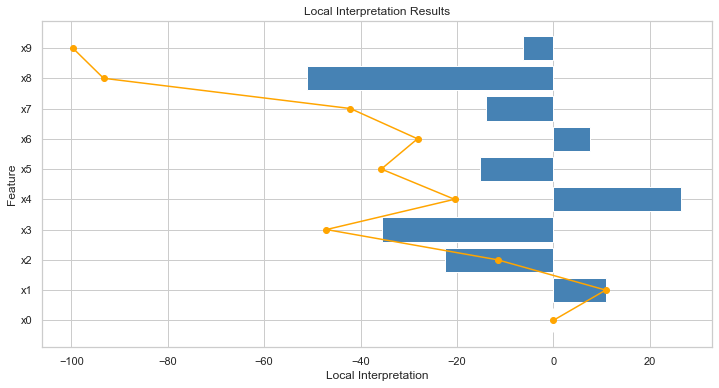

Predicted value: [54.04259478]


In [93]:
# Calculate cumulative sum of local interpretation values
cumulative_values = np.cumsum(local_interpretation)

# Set up the plot
plt.figure(figsize=(12, 6))
plt.barh(feature_names, local_interpretation, color='steelblue')
plt.plot(cumulative_values, feature_names, marker='o', color='orange')

# Set labels and title
plt.xlabel("Local Interpretation")
plt.ylabel("Feature")
plt.title("Local Interpretation Results")

# Show the plot
plt.show()

# Predict the value for the specific instance
prediction = grid.best_estimator_.predict(instance.reshape(1, -1))

# Print the predicted value
print("Predicted value:", prediction)

In [116]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RF model
rf_model = RandomForestRegressor(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_

In [117]:
# Evaluate the ANN model on the test set
predictions = best_model.predict(X_test)

# Calculate evaluation metrics
mse_black_box = mean_squared_error(y_test, predictions)
mae_black_box = mean_absolute_error(y_test, predictions)
r2_black_box = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_black_box)
print("Mean Absolute Error (MAE):", mae_black_box)
print("R-squared (R2):", r2_black_box)

Mean Squared Error (MSE): 2869.3057994557807
Mean Absolute Error (MAE): 43.613702288306115
R-squared (R2): 0.45260660216173787


In [118]:
# Create a table to compare model performances
table = [["Model", "MSE", "MAE", "R-squared"],
         ["White Box", mse_white_box, mae_white_box, r2_white_box],
         ["Black Box", mse_black_box, mae_black_box, r2_black_box]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═══════════╤═════════╤═════════╤═════════════╕
│ Model     │     MSE │     MAE │   R-squared │
╞═══════════╪═════════╪═════════╪═════════════╡
│ White Box │ 2900.17 │ 42.7939 │    0.452607 │
├───────────┼─────────┼─────────┼─────────────┤
│ Black Box │ 2869.31 │ 43.6137 │    0.452607 │
╘═══════════╧═════════╧═════════╧═════════════╛


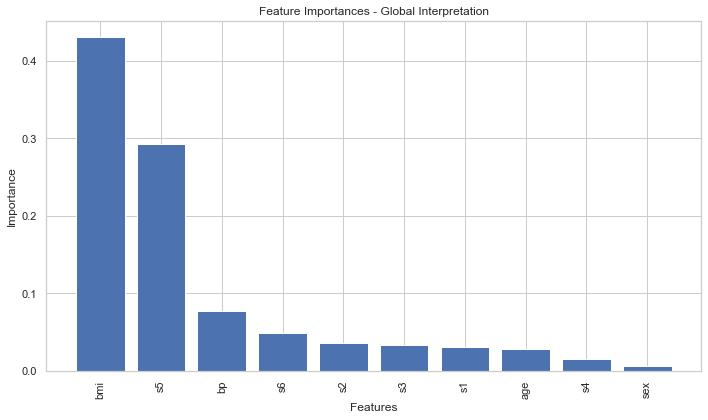

In [122]:
# Get feature importances from the best RF model
feature_importances = best_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Get feature names
feature_names = diabetes.feature_names

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Global Interpretation")
plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

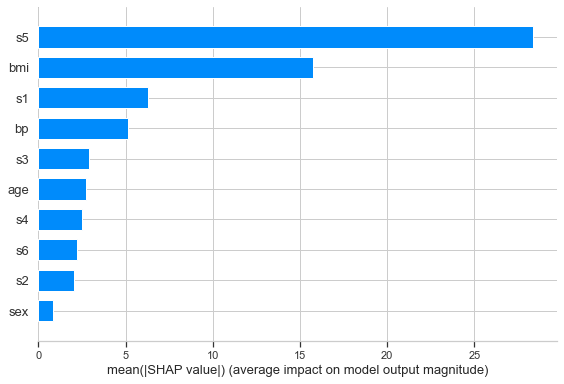

In [141]:
# Initialize the SHAP explainer
explainer = shap.Explainer(best_model)

# Choose a specific instance for interpretation
instance_idx = 0
instance = X_test[instance_idx]

# Compute the SHAP values for the chosen instance
shap_values = explainer.shap_values(instance)

# Reshape SHAP values for summary plot
shap_values_reshaped = shap_values.reshape(1, -1)

# Plot the summary plot for the chosen instance
shap.summary_plot(shap_values_reshaped, feature_names=feature_names, plot_type='bar', alpha=0.8)

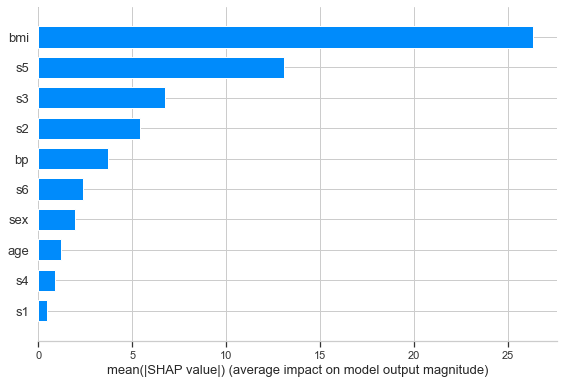

In [142]:
# Initialize the SHAP explainer
explainer = shap.Explainer(best_model)

# Choose a specific instance for interpretation
instance_idx = 5
instance = X_test[instance_idx]

# Compute the SHAP values for the chosen instance
shap_values = explainer.shap_values(instance)

# Reshape SHAP values for summary plot
shap_values_reshaped = shap_values.reshape(1, -1)

# Plot the summary plot for the chosen instance
shap.summary_plot(shap_values_reshaped, feature_names=feature_names, plot_type='bar', alpha=0.8)